In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/data/halong_quality.csv', index_col='date')

In [4]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,6,6,45,3,500,NaN
3/2/2019,59,55,1,6,500,NaN
3/3/2019,43,28,5,9,500,NaN
3/4/2019,27,3,4,16,500,NaN
3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...
5/28/2024,64,32,48,9,500,NaN
5/29/2024,47,20,23,8,500,NaN
5/30/2024,40,6,49,9,500,NaN


In [5]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [6]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/50
128/128 [==============================] - 2s 6ms/step - loss: 0.0211 - val_loss: 0.0126
Epoch 2/50
128/128 [==============================] - 1s 6ms/step - loss: 0.0182 - val_loss: 0.0126
Epoch 3/50
128/128 [==============================] - 1s 6ms/step - loss: 0.0178 - val_loss: 0.0127
Epoch 4/50
128/128 [==============================] - 2s 16ms/step - loss: 0.0179 - val_loss: 0.0134
Epoch 5/50
128/128 [==============================] - 3s 24ms/step - loss: 0.0175 - val_loss: 0.0131
Epoch 6/50
128/128 [==============================] - 1s 10ms/step - loss: 0.0178 - val_loss: 0.0130
Epoch 7/50
128/128 [==============================] - 1s 11ms/step - loss: 0.0174 - val_loss: 0.0128
Epoch 8/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0128
Epoch 9/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0132
Epoch 10/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.

In [10]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.37341772 0.26582278 0.22151899 0.0443038  0.20253165]
Predict value:
12/12 [==============================] - 0s 2ms/step
[[ 0.07810041]
 [ 0.26789895]
 [ 0.48968202]
 [ 0.1909501 ]
 [ 0.34916204]
 [ 0.26691175]
 [ 0.31781876]
 [ 0.36318588]
 [ 0.14351206]
 [ 0.2936452 ]
 [ 0.2594952 ]
 [ 0.23991355]
 [ 0.35226774]
 [ 0.13115747]
 [ 0.12572186]
 [ 0.2621393 ]
 [ 0.24571036]
 [ 0.10856815]
 [ 0.26508623]
 [ 0.21625657]
 [ 0.23327675]
 [ 0.23331156]
 [ 0.1076338 ]
 [ 0.08845963]
 [ 0.24591114]
 [ 0.277681  ]
 [ 0.09395966]
 [ 0.26572624]
 [ 0.20610595]
 [ 0.19414207]
 [ 0.4715725 ]
 [ 0.03481785]
 [ 0.33995706]
 [ 0.15201233]
 [ 0.13081847]
 [ 0.12959564]
 [ 0.3251172 ]
 [ 0.01240183]
 [ 0.13772303]
 [ 0.17332263]
 [ 0.23352304]
 [ 0.23264249]
 [ 0.10238975]
 [ 0.13852936]
 [ 0.20129684]
 [ 0.17457855]
 [ 0.14208438]
 [ 0.13074109]
 [ 0.07464901]
 [ 0.07773202]
 [-0.01776273]
 [ 0.06768689]
 [ 0.12311094]
 [ 0.01637517]
 [ 0.13375667]
 [ 0.11038856]
 [ 0.09362598]
 [ 0.1

In [11]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 2ms/step


0.18532347038865135

In [12]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.0943688229631641
MAPE: 19267781299182.32
MAE: 0.07014865229339931


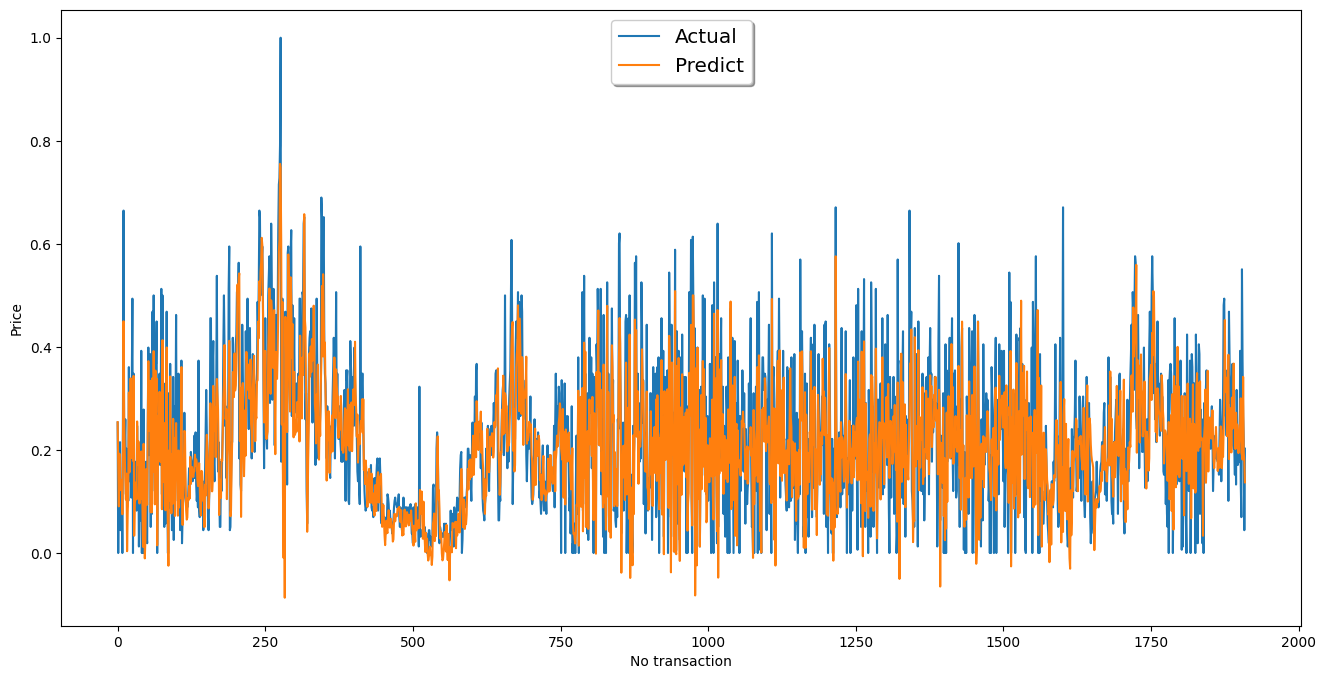

In [14]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [15]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 29ms/step
Next 90 days PM2.5 predictions: [26.671629 24.35583  21.095177 49.49574  57.818916 51.608353 36.897842
 40.13884  38.94588  38.476986 42.921425 52.822342 50.674625 49.168896
 44.935795 45.271854 43.71316  40.768024 43.813316 46.89444  46.344337
 45.494537 43.635757 42.20277  40.23054  39.206207 40.453514 41.479053
 41.48754  40.924076 39.670666 37.920677 36.33217  35.822395 36.10453
 36.575027 37.121174 37.358593 37.6349   37.62827  37.21179  36.53401
 35.925224 35.567997 35.620758 35.7705   35.97668  36.136913 36.40193
 36.529686 36.449913 36.16007  35.952583 35.771343 35.693027 35.617996
 35.720997 35.849575 36.014896 36.06488  36.11808  36.05541  35.995728
 35.853928 35.804455 35.73697  35.769096 35.777637 35.877914 35.912296
 35.981293 35.951653 35.965717 35.893505 35.879166 35.806744 35.827305
 35.800667 35.857735 35.850945 35.916058 35.896984 35.9344   35.884464
 35.903168 35.84519  35.86778  35.8229   35.86718  35.8394  ]


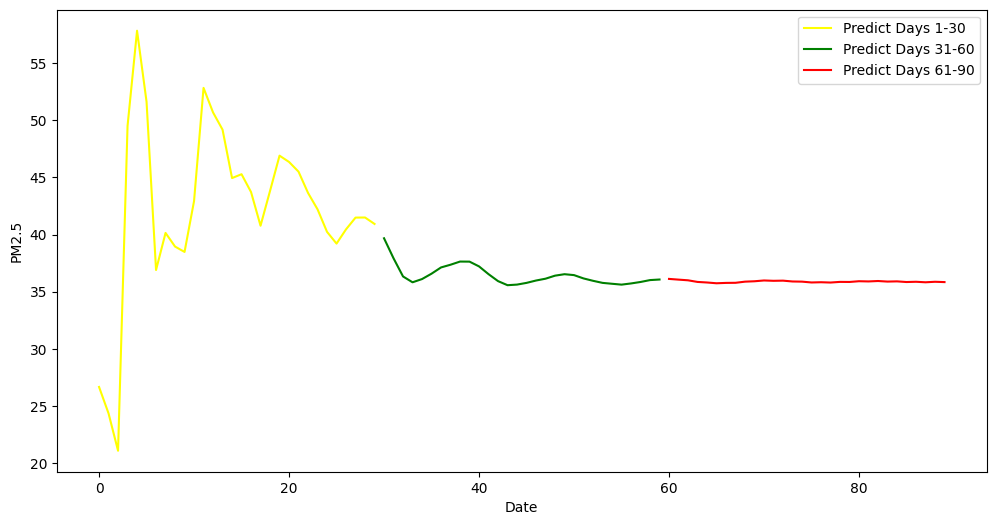

In [16]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()